<a href="https://colab.research.google.com/github/ANSHUMANDAS1506/Epidemic-Analysis/blob/main/Populationdensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/state_level_latest.csv')  # Replace with actual file path

In [3]:
df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Population Density,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Maharashtra,479779,316375,16792,146305,6/8/2020 20:42,307,MH,365,NaN,NaN,NaN
1,Tamil Nadu,279144,221087,4571,53486,6/8/2020 19:44,0,TN,555,NaN,NaN,NaN
2,Delhi,141531,127124,4059,10348,6/8/2020 18:39,0,DL,"11,297",NaN,NaN,NaN
3,Karnataka,158254,80281,2897,75067,6/8/2020 21:19,9,KA,319,NaN,NaN,NaN
4,Andhra Pradesh,196789,112870,1753,82166,6/8/2020 19:45,0,AP,308,NaN,NaN,NaN
5,Uttar Pradesh,108974,63402,1918,43654,6/8/2020 17:53,0,UP,829,NaN,NaN,NaN
6,Gujarat,67811,50524,2579,14708,6/8/2020 21:28,0,GJ,325,NaN,NaN,NaN
7,West Bengal,86754,61023,1902,23829,6/8/2020 21:28,0,WB,"1,028",NaN,NaN,NaN
8,Telangana,73050,52103,589,20358,6/8/2020 11:26,0,TG,312,NaN,NaN,NaN
9,Rajasthan,48996,35131,757,13108,6/8/2020 21:54,0,RJ,200,NaN,NaN,NaN


In [4]:
df.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Population Density,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Maharashtra,479779,316375,16792,146305,6/8/2020 20:42,307,MH,365,NaN,NaN,NaN
1,Tamil Nadu,279144,221087,4571,53486,6/8/2020 19:44,0,TN,555,NaN,NaN,NaN
2,Delhi,141531,127124,4059,10348,6/8/2020 18:39,0,DL,"11,297",NaN,NaN,NaN
3,Karnataka,158254,80281,2897,75067,6/8/2020 21:19,9,KA,319,NaN,NaN,NaN
4,Andhra Pradesh,196789,112870,1753,82166,6/8/2020 19:45,0,AP,308,NaN,NaN,NaN


In [5]:
df.tail()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Population Density,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,Sikkim,829,353,1,475,6/8/2020 23:01,0,SK,86,NaN,NaN,NaN
33,Mizoram,538,288,0,249,6/8/2020 17:29,1,MZ,52,NaN,NaN,NaN
34,Andaman and Nicobar Islands,1123,355,16,752,6/8/2020 20:45,0,AN,46,NaN,NaN,NaN
35,Lakshadweep,0,0,0,0,26/03/2020 07:19:29,0,LD,"1,970",NaN,NaN,NaN
36,Total,2025409,1377384,41638,605933,6/8/2020 23:46,454,TT,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(columns=['Unnamed: 11','Unnamed: 10','Unnamed: 9'])

In [7]:
df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Population Density
0,Maharashtra,479779,316375,16792,146305,6/8/2020 20:42,307,MH,365
1,Tamil Nadu,279144,221087,4571,53486,6/8/2020 19:44,0,TN,555
2,Delhi,141531,127124,4059,10348,6/8/2020 18:39,0,DL,"11,297"
3,Karnataka,158254,80281,2897,75067,6/8/2020 21:19,9,KA,319
4,Andhra Pradesh,196789,112870,1753,82166,6/8/2020 19:45,0,AP,308
5,Uttar Pradesh,108974,63402,1918,43654,6/8/2020 17:53,0,UP,829
6,Gujarat,67811,50524,2579,14708,6/8/2020 21:28,0,GJ,325
7,West Bengal,86754,61023,1902,23829,6/8/2020 21:28,0,WB,"1,028"
8,Telangana,73050,52103,589,20358,6/8/2020 11:26,0,TG,312
9,Rajasthan,48996,35131,757,13108,6/8/2020 21:54,0,RJ,200


In [8]:
# Step 2: Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               37 non-null     object
 1   Confirmed           37 non-null     int64 
 2   Recovered           37 non-null     int64 
 3   Deaths              37 non-null     int64 
 4   Active              37 non-null     int64 
 5   Last_Updated_Time   37 non-null     object
 6   Migrated_Other      37 non-null     int64 
 7   State_code          37 non-null     object
 8   Population Density  36 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.7+ KB
None
          Confirmed     Recovered        Deaths         Active  Migrated_Other
count  3.700000e+01  3.700000e+01     37.000000      37.000000       37.000000
mean   1.094816e+05  7.445319e+04   2250.702703   32753.135135       24.540541
std    3.373476e+05  2.295793e+05   7253.031063  101237.949738       88.515722

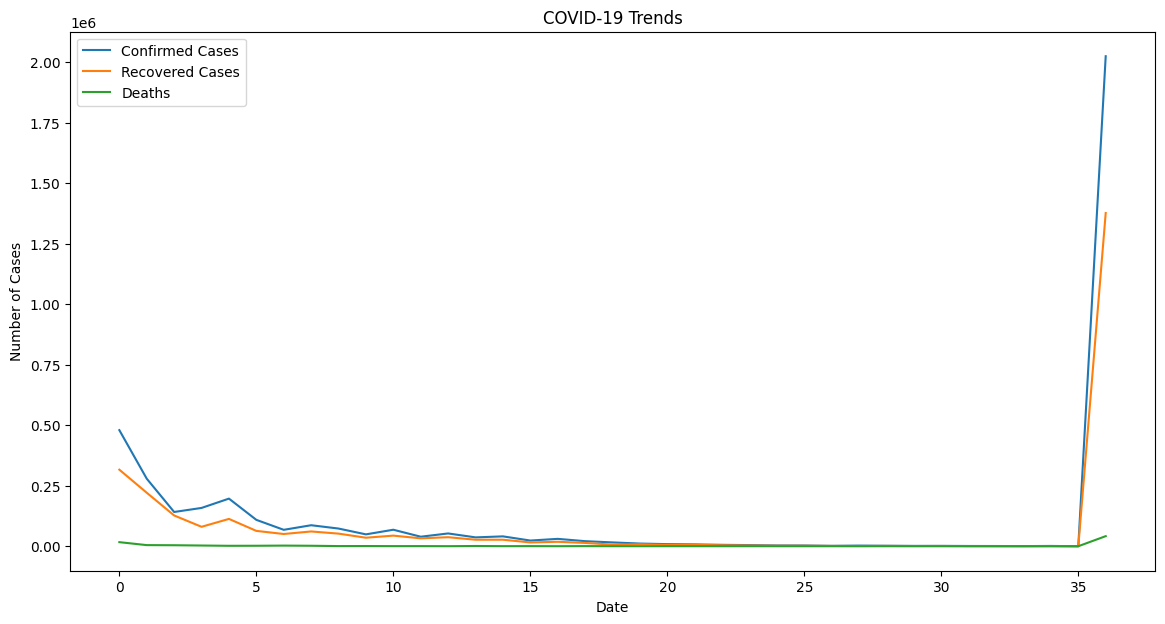

In [9]:
# Step 3: Plot the time series trends
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Confirmed'], label='Confirmed Cases')
plt.plot(df.index, df['Recovered'], label='Recovered Cases')
plt.plot(df.index, df['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Trends')
plt.legend()
plt.show()

In [10]:
import pandas as pd


# Convert 'Last_Updated_Time' to datetime with proper handling
df['Last_Updated_Time'] = pd.to_datetime(df['Last_Updated_Time'], dayfirst=True, errors='coerce')

# Check if any dates failed to parse
failed_dates = df[df['Last_Updated_Time'].isna()]
if not failed_dates.empty:
    print("Rows with failed date parsing:")
    print(failed_dates)

Rows with failed date parsing:
          State  Confirmed  Recovered  Deaths  Active Last_Updated_Time  \
35  Lakshadweep          0          0       0       0               NaT   

    Migrated_Other State_code Population Density  
35               0         LD              1,970  


In [11]:
# Step 2: Data Cleaning and Preprocessing
df['Last_Updated_Time'] = pd.to_datetime(df['Last_Updated_Time'])
df['Population Density'] = pd.to_numeric(df['Population Density'], errors='coerce')  # Ensure numeric

In [12]:
# # Drop rows with missing values if necessary
# df = df.dropna(subset=['Confirmed', 'Population Density'])

In [23]:
# Step 3: Group data by state and get the total confirmed cases, population density, and migration
state_data = df.groupby('State').agg({
    'Confirmed': 'max',  # Take the max confirmed cases as a representative
    'Population Density': 'first',  # Population density should be the same for a state
    'Migrated_Other': 'first'  # Assuming migration data is consistent within a state
}).reset_index()


In [14]:
import seaborn as sns

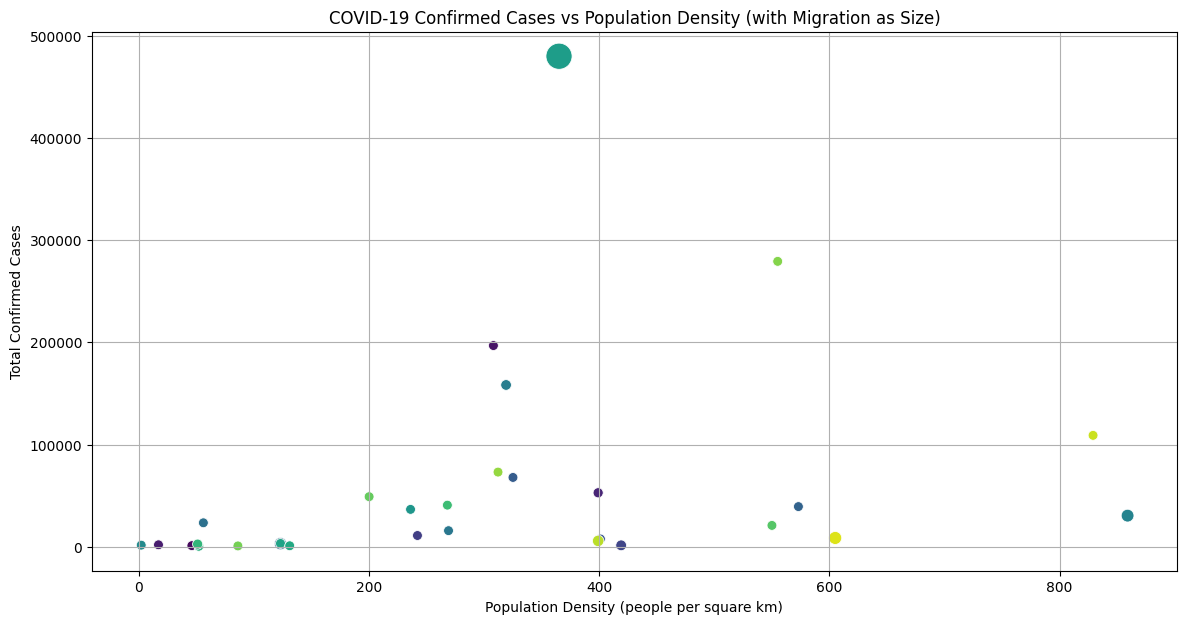

In [24]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=state_data, x='Population Density', y='Confirmed',
                hue='State', size='Migrated_Other', sizes=(50, 500), palette='viridis', legend=False)

plt.title('COVID-19 Confirmed Cases vs Population Density (with Migration as Size)')
plt.xlabel('Population Density (people per square km)')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

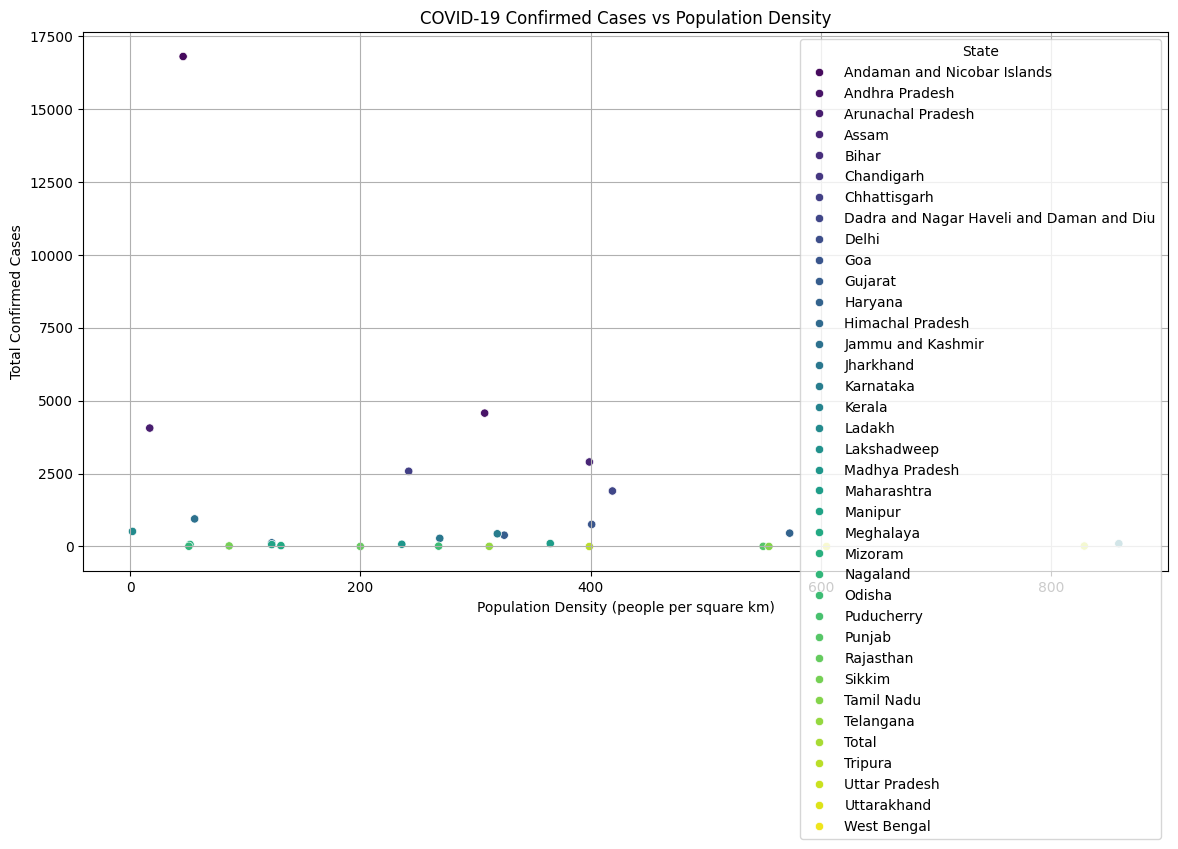

In [16]:
# Step 4: Analyze and Visualize Trends
plt.figure(figsize=(14, 7))
sns.scatterplot(data=state_data, x='Population Density', y=df['Deaths'], hue='State', palette='viridis')
plt.title('COVID-19 Confirmed Cases vs Population Density')
plt.xlabel('Population Density (people per square km)')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

In [25]:
# Calculate pairwise correlations between Population Density, Confirmed Cases, and Migration
correlation_population_density_confirmed = state_data['Population Density'].corr(state_data['Confirmed'])
correlation_population_density_migration = state_data['Population Density'].corr(state_data['Migrated_Other'])
correlation_confirmed_migration = state_data['Confirmed'].corr(state_data['Migrated_Other'])

# Print the correlations
print(f"Correlation between Population Density and Confirmed Cases: {correlation_population_density_confirmed:.2f}")
print(f"Correlation between Population Density and Migration: {correlation_population_density_migration:.2f}")
print(f"Correlation between Confirmed Cases and Migration: {correlation_confirmed_migration:.2f}")


Correlation between Population Density and Confirmed Cases: 0.27
Correlation between Population Density and Migration: 0.13
Correlation between Confirmed Cases and Migration: 0.90


In [26]:
correlation_matrix = state_data[['Population Density', 'Confirmed', 'Migrated_Other']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Population Density  Confirmed  Migrated_Other
Population Density            1.000000    0.26987        0.125973
Confirmed                     0.269870    1.00000        0.902970
Migrated_Other                0.125973    0.90297        1.000000


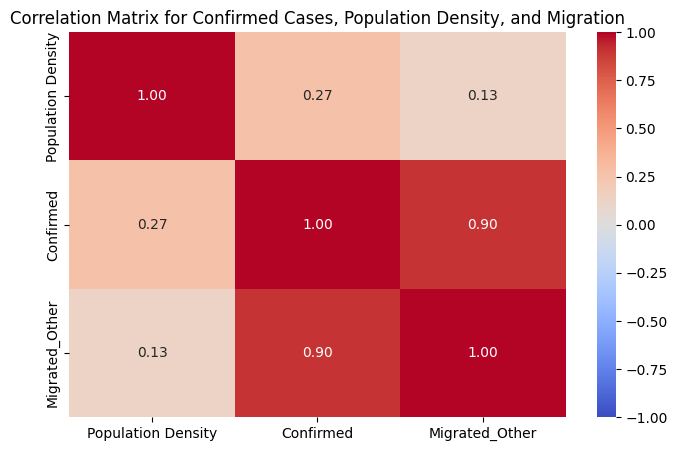

In [27]:

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Confirmed Cases, Population Density, and Migration')
plt.show()


In [28]:
state_data

,State,Confirmed,Population Density,Migrated_Other
0,Andaman and Nicobar Islands,1123,46.0,0
1,Andhra Pradesh,196789,308.0,0
2,Arunachal Pradesh,1948,17.0,0
3,Assam,52818,399.0,3
4,Bihar,68148,NaN,1
5,Chandigarh,1327,NaN,1
6,Chhattisgarh,11020,242.0,0
7,Dadra and Nagar Haveli and Daman and Diu,1415,419.0,10
8,Delhi,141531,NaN,0
9,Goa,7614,401.0,0


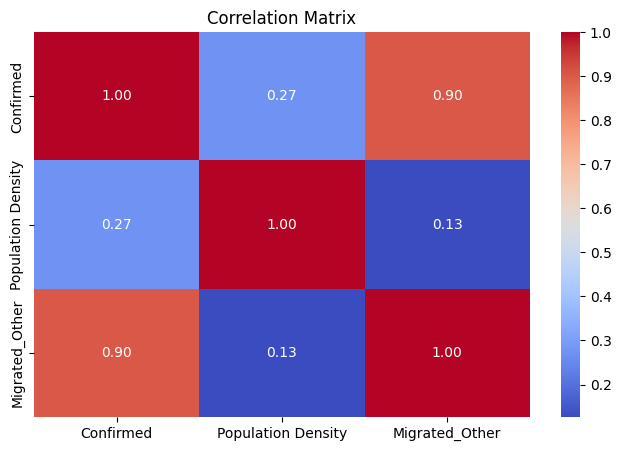

In [29]:
# Step 6: Display a heatmap for a visual correlation matrix (if needed)
plt.figure(figsize=(8, 5))
sns.heatmap(state_data[['Confirmed', 'Population Density', 'Migrated_Other']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


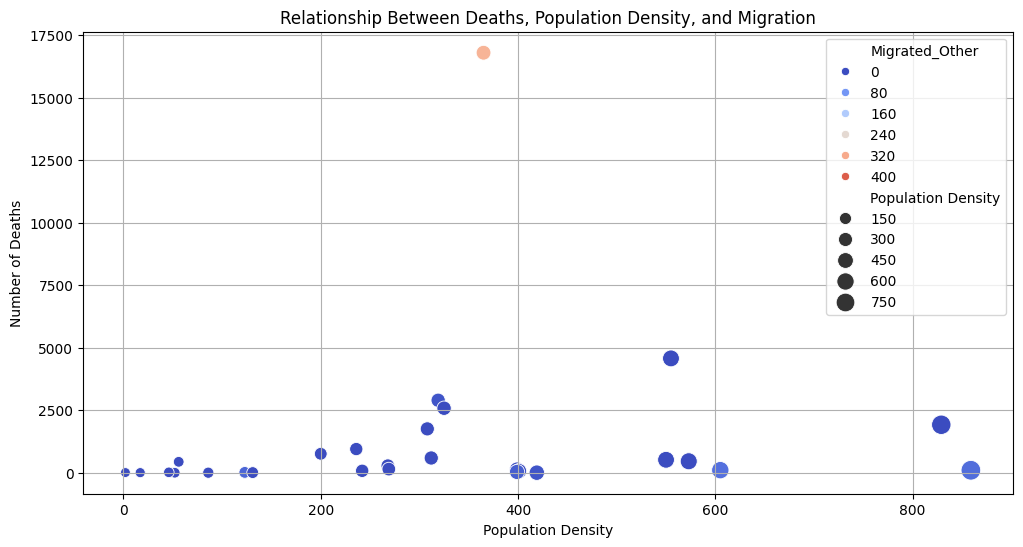

In [30]:
# Assuming migration data is available in the 'Migration' column
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Population Density', y='Deaths', hue='Migrated_Other', palette='coolwarm', size='Population Density', sizes=(50, 200), legend=True)

plt.title('Relationship Between Deaths, Population Density, and Migration')
plt.xlabel('Population Density')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()


In [34]:
df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Population Density
0,Maharashtra,479779,316375,16792,146305,2020-08-06 20:42:00,307,MH,365.0
1,Tamil Nadu,279144,221087,4571,53486,2020-08-06 19:44:00,0,TN,555.0
2,Delhi,141531,127124,4059,10348,2020-08-06 18:39:00,0,DL,NaN
3,Karnataka,158254,80281,2897,75067,2020-08-06 21:19:00,9,KA,319.0
4,Andhra Pradesh,196789,112870,1753,82166,2020-08-06 19:45:00,0,AP,308.0
5,Uttar Pradesh,108974,63402,1918,43654,2020-08-06 17:53:00,0,UP,829.0
6,Gujarat,67811,50524,2579,14708,2020-08-06 21:28:00,0,GJ,325.0
7,West Bengal,86754,61023,1902,23829,2020-08-06 21:28:00,0,WB,NaN
8,Telangana,73050,52103,589,20358,2020-08-06 11:26:00,0,TG,312.0
9,Rajasthan,48996,35131,757,13108,2020-08-06 21:54:00,0,RJ,200.0


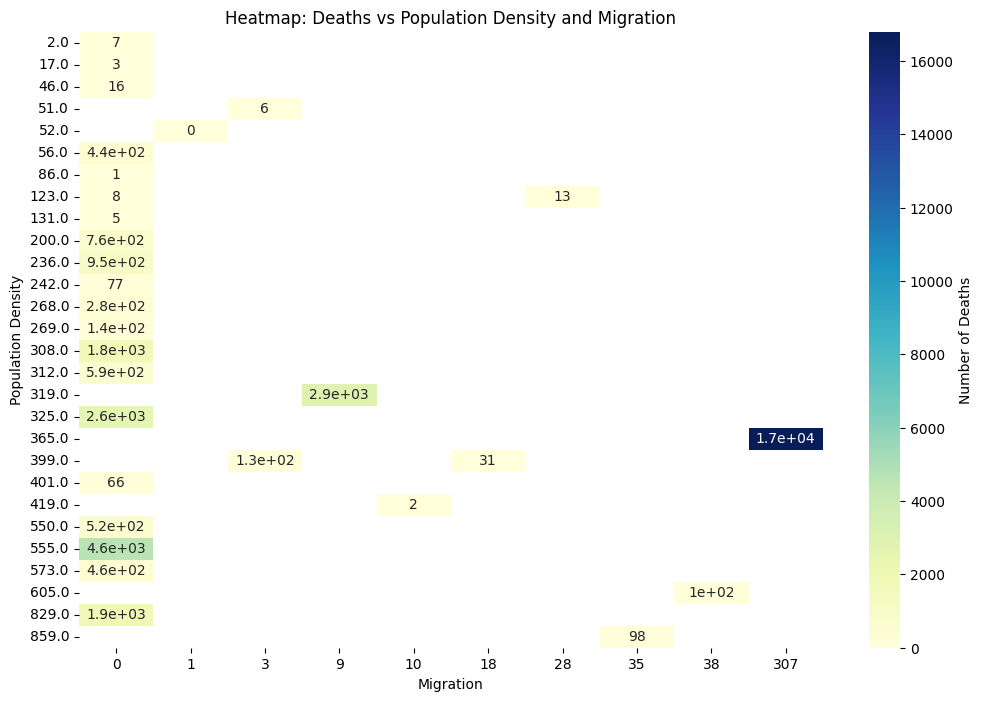

In [38]:
heatmap_data = df.pivot_table(values='Deaths', index='Population Density', columns='Migrated_Other', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Number of Deaths'})
plt.title('Heatmap: Deaths vs Population Density and Migration')
plt.xlabel('Migration')
plt.ylabel('Population Density')
plt.show()

Text(0.5, 0.92, '3D Scatter Plot: Population Density, Deaths, and Migration')

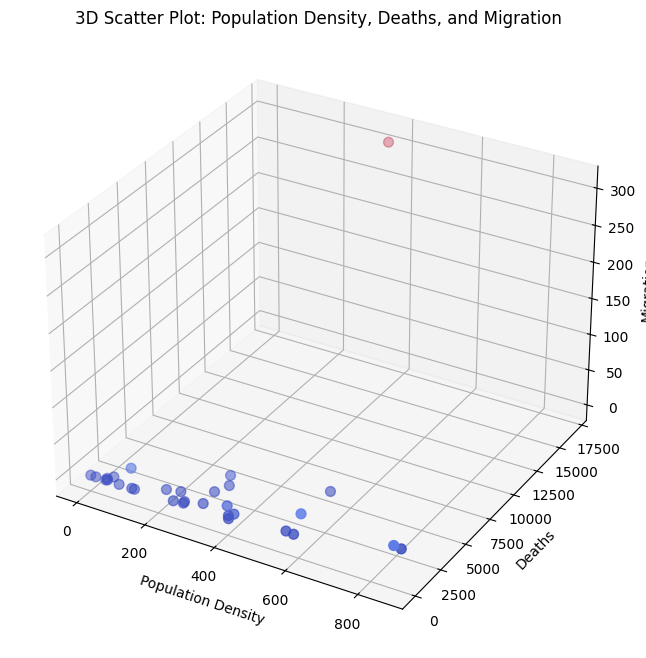

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for Population Density, Deaths, and Migration
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Population Density'], df['Deaths'], df['Migrated_Other'], c=df['Migrated_Other'], cmap='coolwarm', s=50)

# Labels and title
ax.set_xlabel('Population Density')
ax.set_ylabel('Deaths')
ax.set_zlabel('Migration')
ax.set_title('3D Scatter Plot: Population Density, Deaths, and Migration')


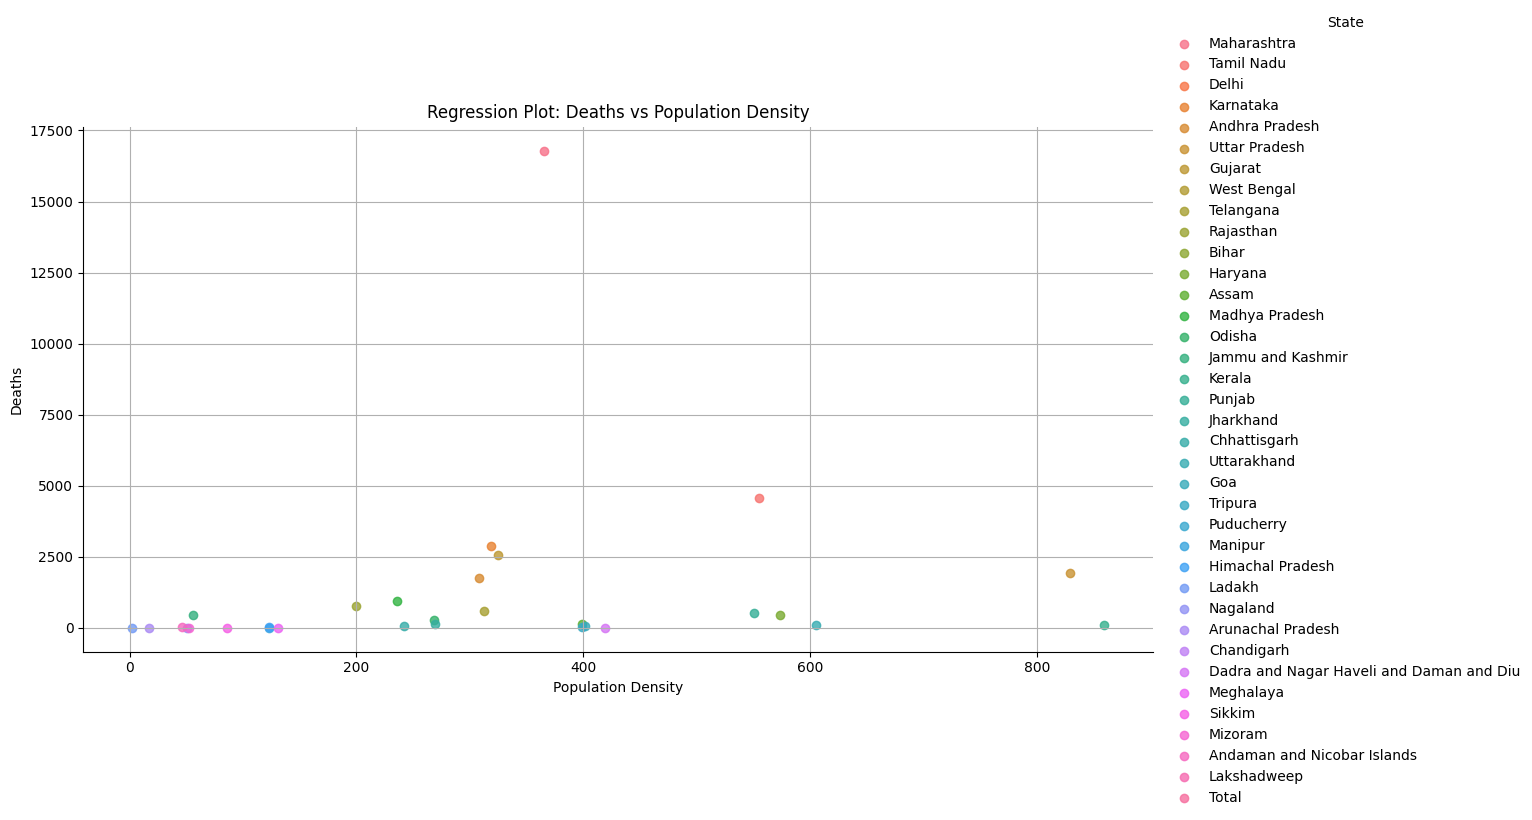

In [40]:
sns.lmplot(data=df, x='Population Density', y='Deaths', hue='State', aspect=2, height=6)
plt.title('Regression Plot: Deaths vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

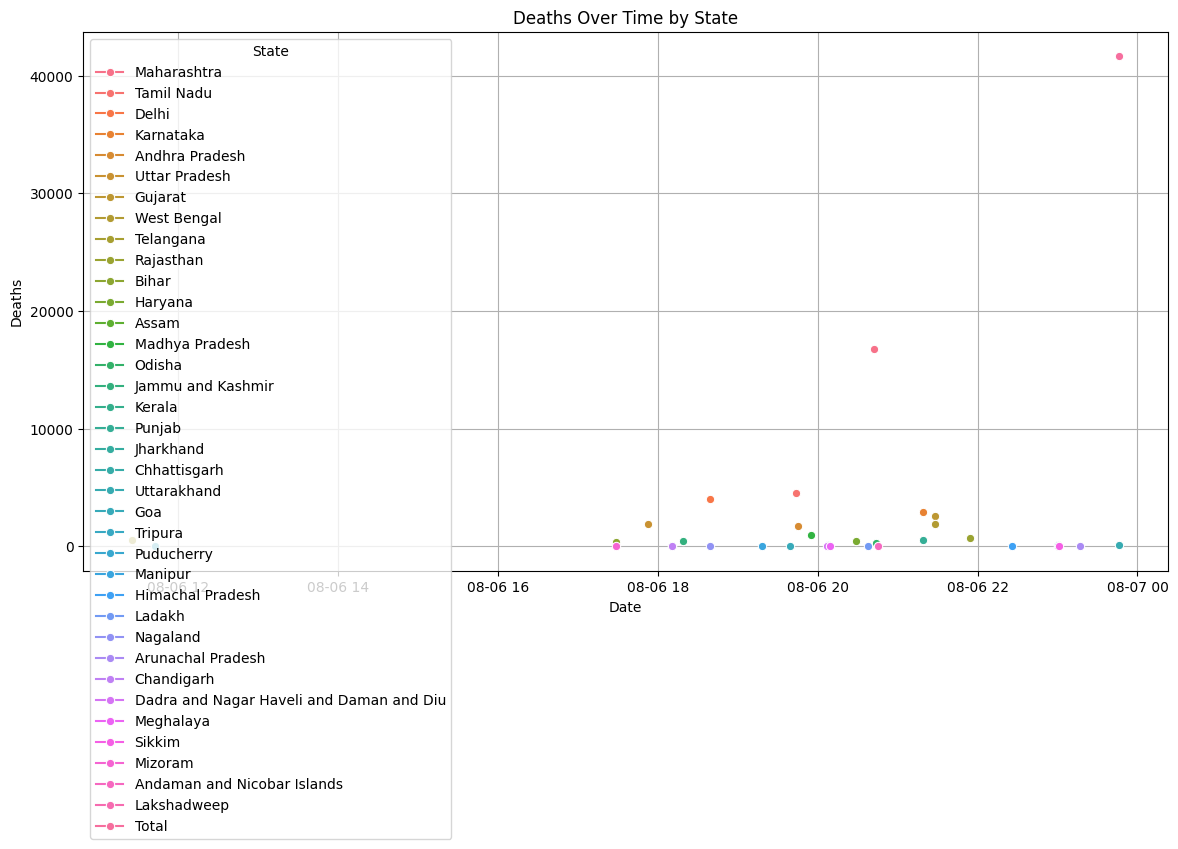

In [41]:
df['Last_Updated_Time'] = pd.to_datetime(df['Last_Updated_Time'])  # Make sure the 'Date' column is in datetime format

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Last_Updated_Time', y='Deaths', hue='State', marker='o')
plt.title('Deaths Over Time by State')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()